In [1]:
import sys
sys.path.append('sources')

# CPI to MDP Pipeline

This notebook demonstrates how to convert a Control Process Interface (CPI) dictionary 
into a Markov Decision Process (MDP) format suitable for the PRISM model checker. We'll walk through:

1. Loading and examining a CPI dictionary
2. Understanding the conversion process
3. Generating PRISM code

In [2]:
import json
from read import read_cpi_bundles

x = 1
y = 1
w = 1

bundle = read_cpi_bundles(x=x, y=y)
D = bundle[w].copy()
T = D.pop('metadata')

FILE = "current_benchmark"
FILE = "test"
# Write to current_benchmark.cpi
with open(f'CPIs/{FILE}.cpi', 'w') as f:
    json.dump(D, f)


# Load example CPI dictionary
with open(f'CPIs/{FILE}.cpi', 'r') as f:
    cpi_dict = json.load(f)

## Process Visualization

The CPI dictionary can be visualized as a directed graph to better understand its structure. In this visualization:

- **Task nodes** show duration and impact values (cost, time, quality)
- **Nature nodes** display their probability values (e.g., "p=0.7")
- **Sequence nodes** connect components with "head" and "tail" edges
- **Parallel nodes** show concurrent branches with "first" and "second" edges
- **Choice nodes** represent decision points with "true" and "false" branches

Each node type is represented as a box, with edges showing the relationships between components. This hierarchical representation helps understand the process flow and decision points in the system.

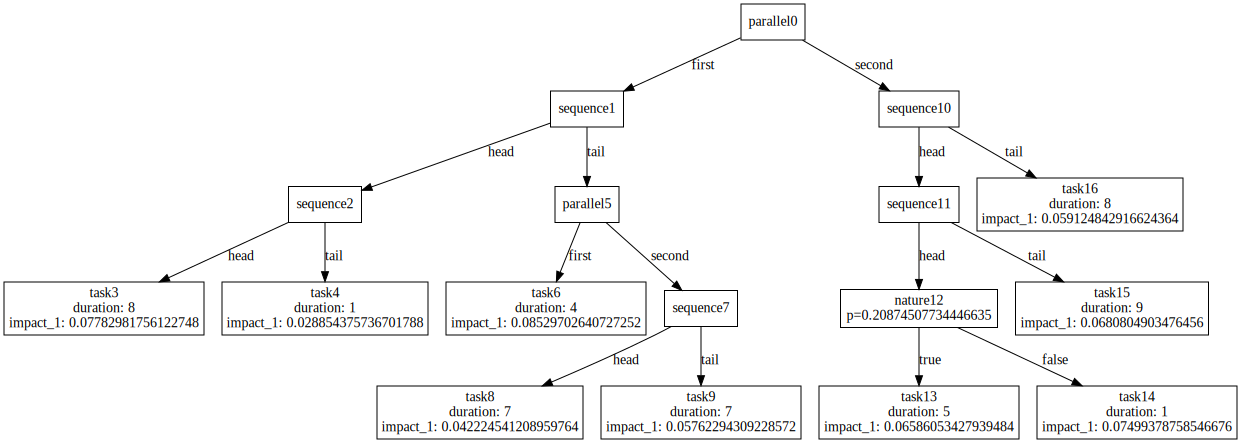

In [3]:
from process_visualization import process_to_dot
from IPython.display import display
from graphviz import Source

dot_graph = process_to_dot(cpi_dict)

src = Source(dot_graph)
display(src)

In [4]:
from etl import cpi_to_model
from prism import run_prism_analysis
from mdp_visualization import show_dot_model

#cpi_to_model(FILE)
#run_prism_analysis(FILE)
#show_dot_model(FILE)

In [5]:
from sampler import sample_expected_impact
from bounds import generate_multi_rewards_requirement

B = sample_expected_impact(cpi_dict)
#B['impact_1']= 2.09
B

{'impact_1': 0.4921213031884014}

In [6]:
from analysis import analyze_bounds

r  = analyze_bounds(FILE, B)
r['result']

pctl_path:  models/test.pctl
model_path:  models/test.nm
['/home/user/Projects/GitHub/cpi-to-prism/prism-4.8.1-linux64-x86/bin/prism', '-cuddmaxmem', '10g', '-javamaxmem', '2g', '/home/user/Projects/GitHub/cpi-to-prism/models/test.nm', '/home/user/Projects/GitHub/cpi-to-prism/models/test.pctl', '-verbose']


In [7]:
r

{'command': '/home/user/Projects/GitHub/cpi-to-prism/prism-4.8.1-linux64-x86/bin/prism -cuddmaxmem 10g -javamaxmem 2g /home/user/Projects/GitHub/cpi-to-prism/models/test.nm /home/user/Projects/GitHub/cpi-to-prism/models/test.pctl -verbose',
 'error': "Command '['/home/user/Projects/GitHub/cpi-to-prism/prism-4.8.1-linux64-x86/bin/prism', '-cuddmaxmem', '10g', '-javamaxmem', '2g', '/home/user/Projects/GitHub/cpi-to-prism/models/test.nm', '/home/user/Projects/GitHub/cpi-to-prism/models/test.pctl', '-verbose']' returned non-zero exit status 1.",
 'prism_output': 'PRISM\n=====\n\nVersion: 4.8.1\nDate: Fri Mar 14 15:55:09 CET 2025\nMemory limits: cudd=10g, java(heap)=2g\nCommand line: prism -cuddmaxmem 10g -javamaxmem 2g /home/user/Projects/GitHub/cpi-to-prism/models/test.nm /home/user/Projects/GitHub/cpi-to-prism/models/test.pctl -verbose\n\nParsing model file "/home/user/Projects/GitHub/cpi-to-prism/models/test.nm"...\n\nError: File "/home/user/Projects/GitHub/cpi-to-prism/models/test.nm" 

In [8]:
print(r['prism_output'])

PRISM
=====

Version: 4.8.1
Date: Fri Mar 14 15:55:09 CET 2025
Memory limits: cudd=10g, java(heap)=2g
Command line: prism -cuddmaxmem 10g -javamaxmem 2g /home/user/Projects/GitHub/cpi-to-prism/models/test.nm /home/user/Projects/GitHub/cpi-to-prism/models/test.pctl -verbose

Parsing model file "/home/user/Projects/GitHub/cpi-to-prism/models/test.nm"...

Error: File "/home/user/Projects/GitHub/cpi-to-prism/models/test.nm" not found.



In [9]:
from refinements import refine_bounds
#refine_bounds('test8', 10, verbose=True)

In [10]:
from read import read_cpi_bundles

d = read_cpi_bundles(x=2,y=3)[3000]

In [11]:
d.pop('metadata')

{'x': 2,
 'y': 3,
 'z': 6,
 'num_impacts': 6,
 'choice_distribution': 0.6,
 'generation_mode': 'random',
 'duration_interval': [1, 10]}

In [12]:
from benchmark import run_random_benchmark
#run_random_benchmark()

ImportError: cannot import name 'run_random_benchmark' from 'benchmark' (/home/user/Projects/GitHub/cpi-to-prism/sources/benchmark.py)